<a href="https://colab.research.google.com/github/mtsilimos/LR_project/blob/main/SML_Iowa_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() DONE

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carloscotrini","key":"8b4da96b7cae50d3270bb782de71542e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission
!pip install kaggle
!kaggle datasets download -d dataset-owner/dataset-name
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip

403 - Forbidden - Permission 'datasets.get' was denied
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 100MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv") DONE
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [ ]:
df["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df["GarageCars"].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

We start by loading the dataset as a data frame.

We start by imputing missing values and doing one-hot encoding to the non-numerical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

raw_df = pd.read_csv("train.csv")
# df.info()

def onehot_impute(raw_df):
  non_numerical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()
  preprocessor = Pipeline(steps=[
      ('transform', ColumnTransformer(
      transformers=[
          ('num', 'passthrough', ~raw_df.columns.isin(non_numerical_cols)),
          ('cat', OneHotEncoder(sparse_output=False), non_numerical_cols)
      ])),
      ('impute', SimpleImputer())
  ])
  transf_data = preprocessor.fit_transform(raw_df)
  column_names = list(map(lambda x: x[5:] if x.startswith('num__') else x, preprocessor.get_feature_names_out()))
  df = pd.DataFrame(transf_data, columns=column_names)
  return df

onehot_impute(raw_df).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


We now train a linear model on the data

In [ ]:
from scipy import stats

def conf_intervals_p_values(model, X_train, y_train):
  # Getting the estimated coefficients
  beta_hat = model.coef_

  # Getting the residuals
  residuals = y_train - model.predict(X_train)

  # Calculating the standard error of the residuals
  sigma_hat = np.sqrt(np.sum(residuals**2) / (len(y_train) - 2))

  # Calculating the standard error of the coefficient
  SE_beta_hat = sigma_hat / np.sqrt(np.sum((X_train - np.mean(X_train))**2))

  # Calculating the z-score for the coefficient
  z_scores = beta_hat / SE_beta_hat

  # Calculating the p-value for the z-score
  p_values = 2 * (1 - stats.norm.cdf(abs(z_scores)))

  # Calculating the confidence intervals for the coefficient
  lower_bound_conf_intervals = beta_hat - 1.96*SE_beta_hat
  upper_bound_conf_intervals = beta_hat + 1.96*SE_beta_hat

  return lower_bound_conf_intervals, upper_bound_conf_intervals, p_values

In [ ]:
def linear_reg(df):
  y = df['SalePrice']
  X = df.drop(['SalePrice'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  lower_bound_conf_intervals, upper_bound_conf_intervals, p_values = conf_intervals_p_values(model, X_train, y_train)
  print(f"R2 score on test data: {r2:.3f}")
  print(f"Sqrt of MSE on test data: {np.sqrt(mse):.3f}")

  results = pd.DataFrame({
      "Coefficients" : model.coef_,
      "LB conf intervals" : lower_bound_conf_intervals,
      "UB conf intervals" : upper_bound_conf_intervals,
      "p-values" : p_values
  })

  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.precision', 2)
  pd.set_option('display.float_format', '{:.5f}'.format)
  pd.set_option('display.width', 1000)
  pd.set_option('display.max_columns', None)

  print(results)

In [ ]:
linear_reg(onehot_impute(raw_df))

R2 score on test data: 0.479
Sqrt of MSE on test data: 60413.185
                             Coefficients  LB conf intervals  UB conf intervals  p-values
Id                               -0.08172           -2.76152            2.59808   0.95234
MSSubClass                       51.68130           24.99021           78.37240   0.00015
LotFrontage                      30.40681          -19.49605           80.30967   0.23237
LotArea                           0.75374            0.65093            0.85656   0.00000
OverallQual                    6927.00924         6094.59731         7759.42117   0.00000
OverallCond                    5004.10487         3974.03142         6034.17832   0.00000
YearBuilt                       315.41888          278.24621          352.59155   0.00000
YearRemodAdd                    133.78936           78.91431          188.66441   0.00000
MasVnrArea                       22.97238           16.33203           29.61273   0.00000
BsmtFinSF1                       15

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
from sklearn.linear_model import Ridge

def ridge_reg(df):
  y = df['SalePrice']
  X = df.drop(['SalePrice'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

  model = Ridge()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  lower_bound_conf_intervals, upper_bound_conf_intervals, p_values = conf_intervals_p_values(model, X_train, y_train)
  print(f"R2 score on test data: {r2:.3f}")
  print(f"Sqrt of MSE on test data: {np.sqrt(mse):.3f}")

  results = pd.DataFrame({
      "Coefficients" : model.coef_,
      "LB conf intervals" : lower_bound_conf_intervals,
      "UB conf intervals" : upper_bound_conf_intervals,
      "p-values" : p_values
  })

  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.precision', 2)
  pd.set_option('display.float_format', '{:.5f}'.format)
  pd.set_option('display.width', 1000)
  pd.set_option('display.max_columns', None)

  print(results)

In [ ]:
raw_df = pd.read_csv("train.csv")
ridge_reg(onehot_impute(raw_df))

R2 score on test data: 0.886
Sqrt of MSE on test data: 28199.690
                            Coefficients  LB conf intervals  UB conf intervals  p-values
Id                              -0.56015           -3.57054            2.45024   0.71533
MSSubClass                     -42.22604          -72.20984          -12.24223   0.00578
LotFrontage                   -105.84501         -161.90406          -49.78596   0.00022
LotArea                          0.49190            0.37640            0.60739   0.00000
OverallQual                   7672.79823         6737.69711         8607.89935   0.00000
OverallCond                   5044.63547         3887.48863         6201.78232   0.00000
YearBuilt                      252.52805          210.76963          294.28647   0.00000
YearRemodAdd                    85.28319           23.63857          146.92782   0.00670
MasVnrArea                      16.42340            8.96387           23.88293   0.00002
BsmtFinSF1                       5.10261     

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Let us know delve into the sale price variable.

In [ ]:
raw_df = pd.read_csv("train.csv")

raw_df['SalePrice'].describe()

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

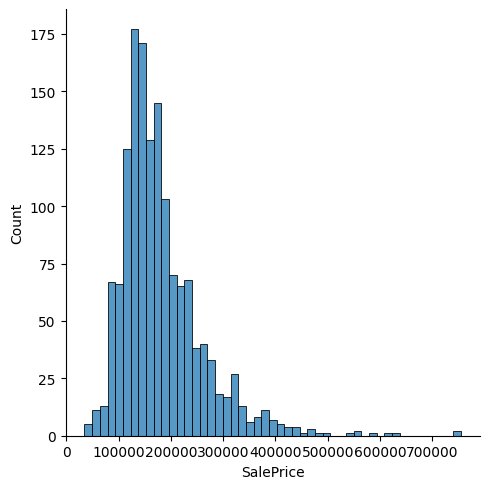

In [ ]:
import seaborn as sns

sns.displot(raw_df['SalePrice'])

Review the features here: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data and pick 5 that in your opinion, should be the most influential.

We now plot a correlation matrix to identify possibly duplicated features

<ipython-input-12-9221dcec426c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = raw_df.corr()


<Axes: >

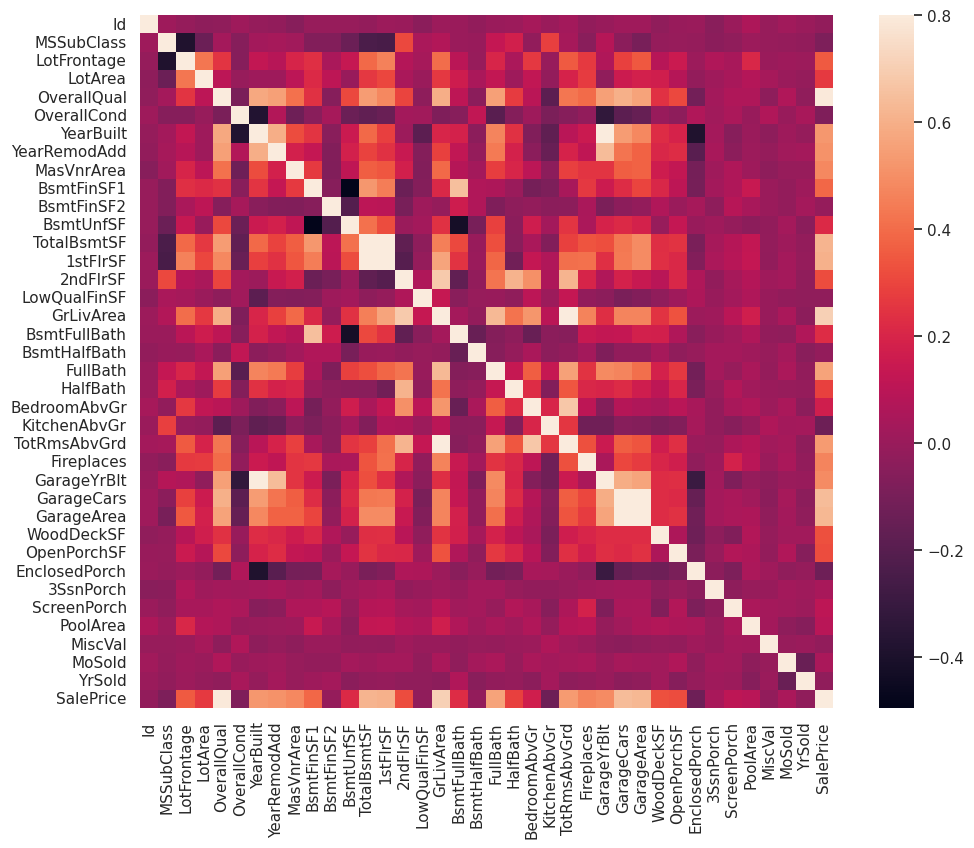

In [ ]:
import matplotlib.pyplot as plt

corrmat = raw_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Get the 10 variables that are the most correlated with the price and then plot a correlation matrix for them.

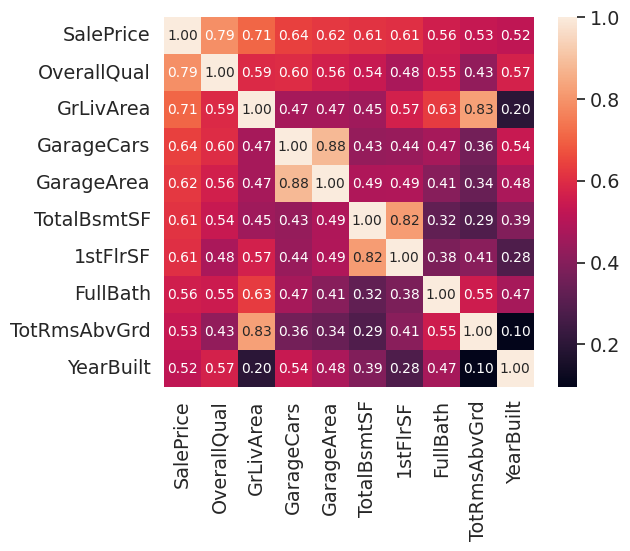

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(raw_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


We remove possibly duplicate features and plot now scatterplots between pairs of these remaining features

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


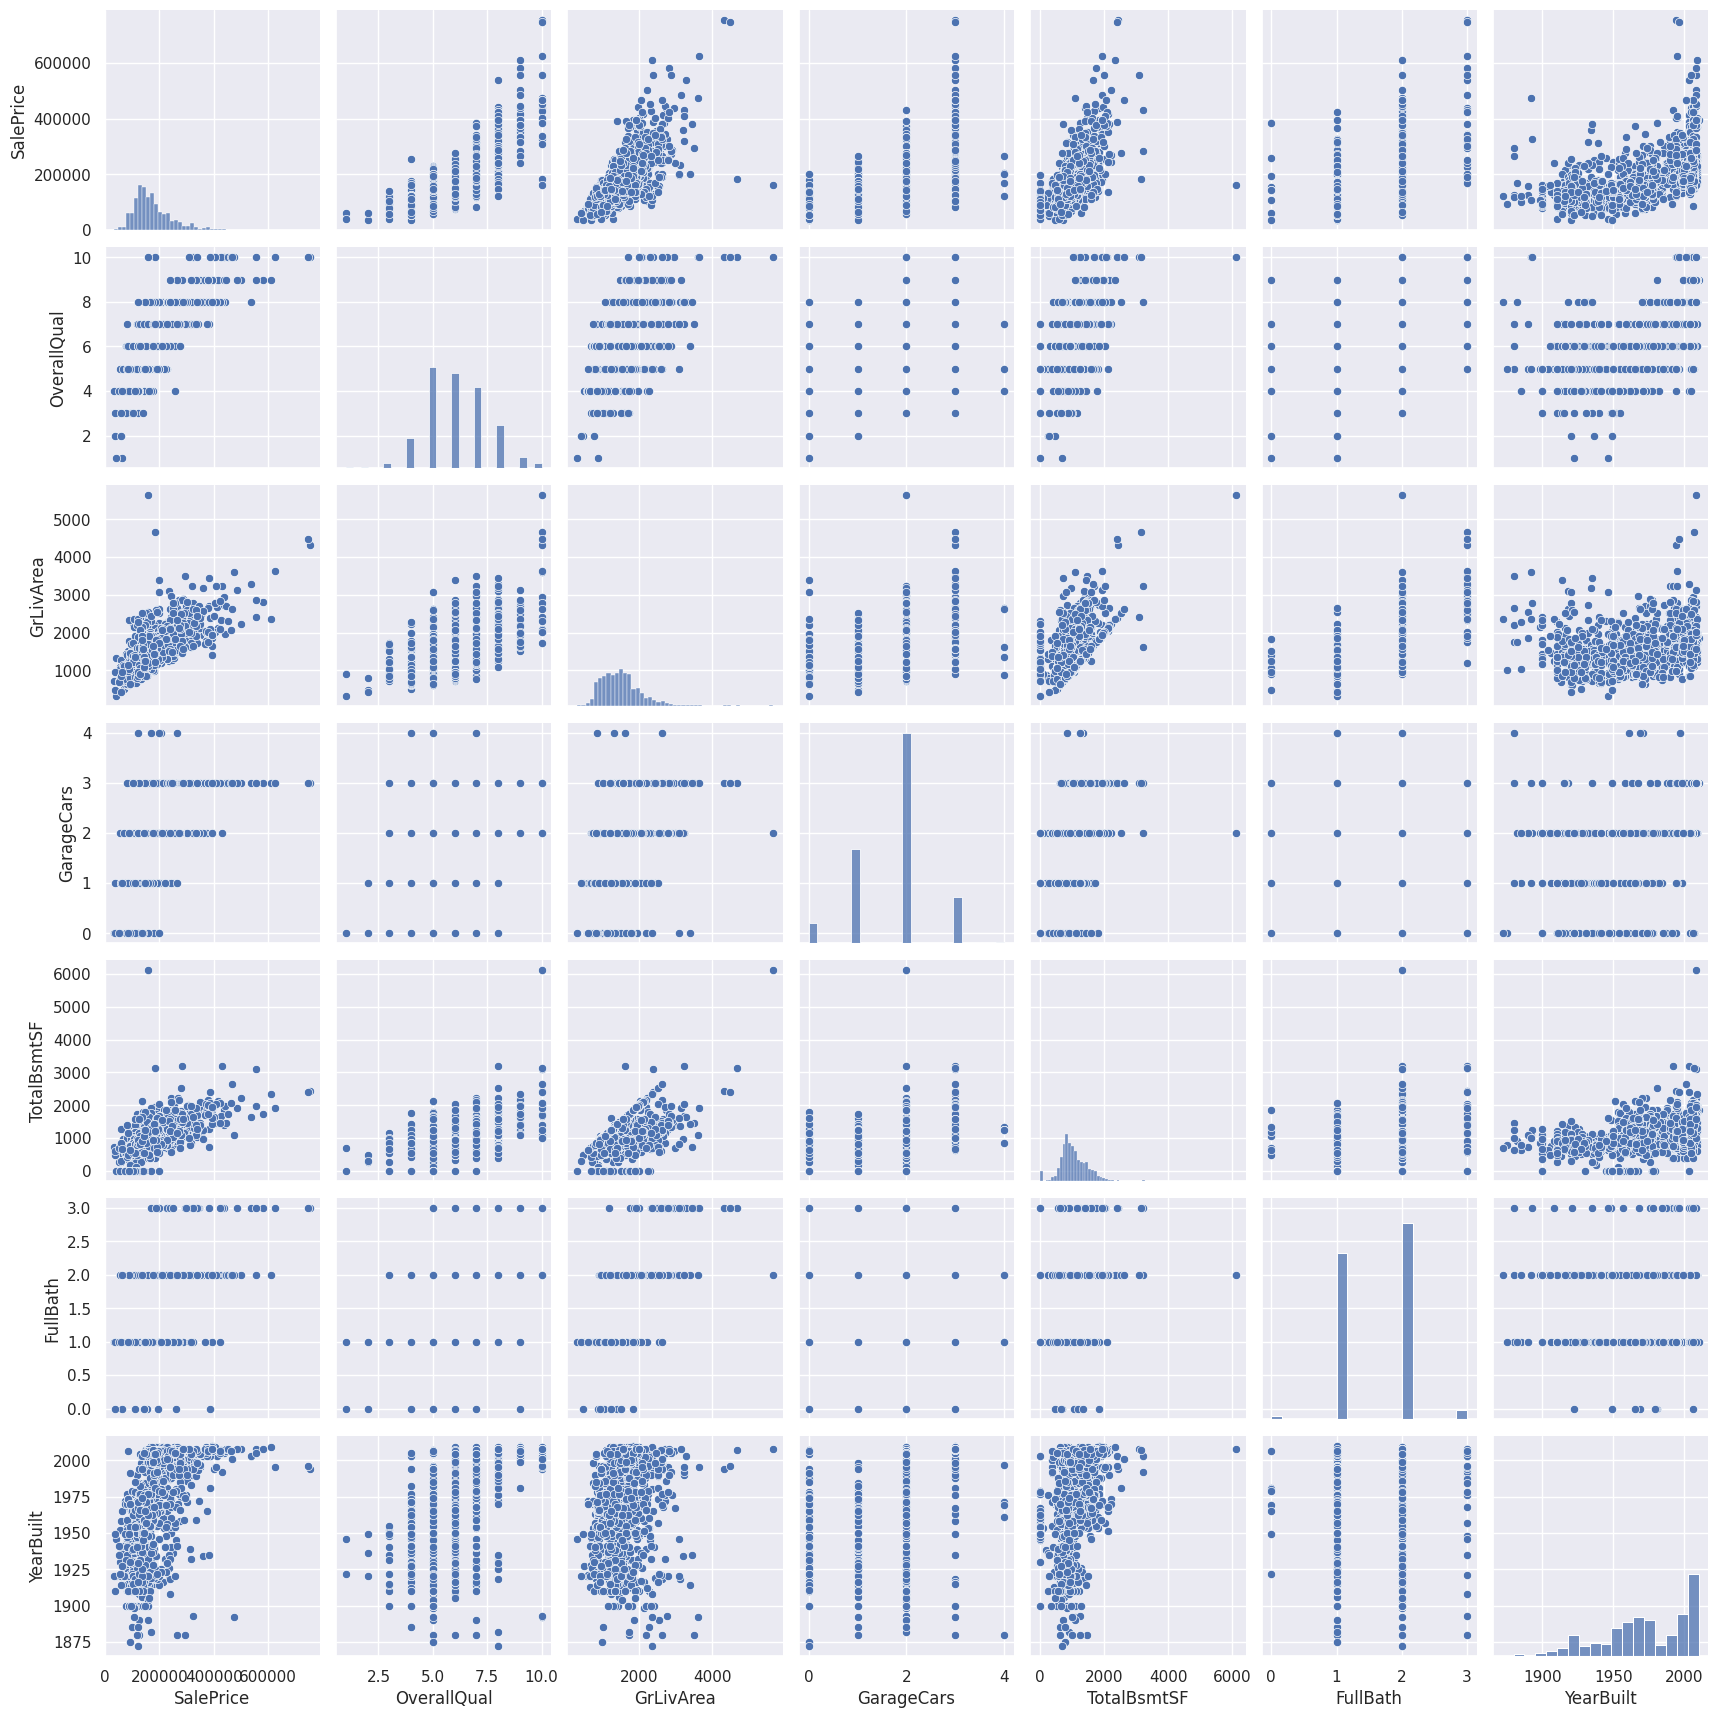

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(raw_df[cols], size = 2.5)
plt.show();

In [ ]:
linear_reg(onehot_impute(raw_df[cols]))

R2 score on test data: 0.796
MSE on test data: 37845.046
             Coefficients  LB conf intervals  UB conf intervals  p-values
OverallQual   20399.27307        18730.03533        22068.51082   0.00000
GrLivArea        52.40689           48.07944           56.73434   0.00000
GarageCars    16126.64587        13017.74565        19235.54609   0.00000
TotalBsmtSF      23.22192           18.08218           28.36165   0.00000
FullBath      -5860.38041       -10046.66206        -1674.09876   0.00607
YearBuilt       374.44276          299.90031          448.98521   0.00000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Missing data

We now count, for each feature, how many values are missing, and then rank them according to the percentage of missing values.

In [ ]:
#missing data
total = raw_df.isnull().sum().sort_values(ascending=False)
percent = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.99521
MiscFeature,1406,0.96301
Alley,1369,0.93767
Fence,1179,0.80753
FireplaceQu,690,0.47260
LotFrontage,259,0.17740
GarageYrBlt,81,0.05548
GarageCond,81,0.05548
GarageType,81,0.05548
GarageFinish,81,0.05548


We now delete features that have more than 1 missing example. We also delete all examples who have a missing value for the 'Electrical' feature.

In [ ]:
# raw_df = pd.read_csv("train.csv") DO THIS ONLY TO RESTART THE DATA
raw_df = raw_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
raw_df = raw_df.drop(raw_df.loc[raw_df['Electrical'].isnull()].index)
raw_df.isnull().sum().max() #Sanity check

<ipython-input-56-c6f0a8701f17>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  raw_df = raw_df.drop((missing_data[missing_data['Total'] > 1]).index,1)


KeyError: ignored

This part actually makes little sense because none of these variables seem to be influential for prediction

## Removing outliers

We consider again the pairwise plots from our selected features

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


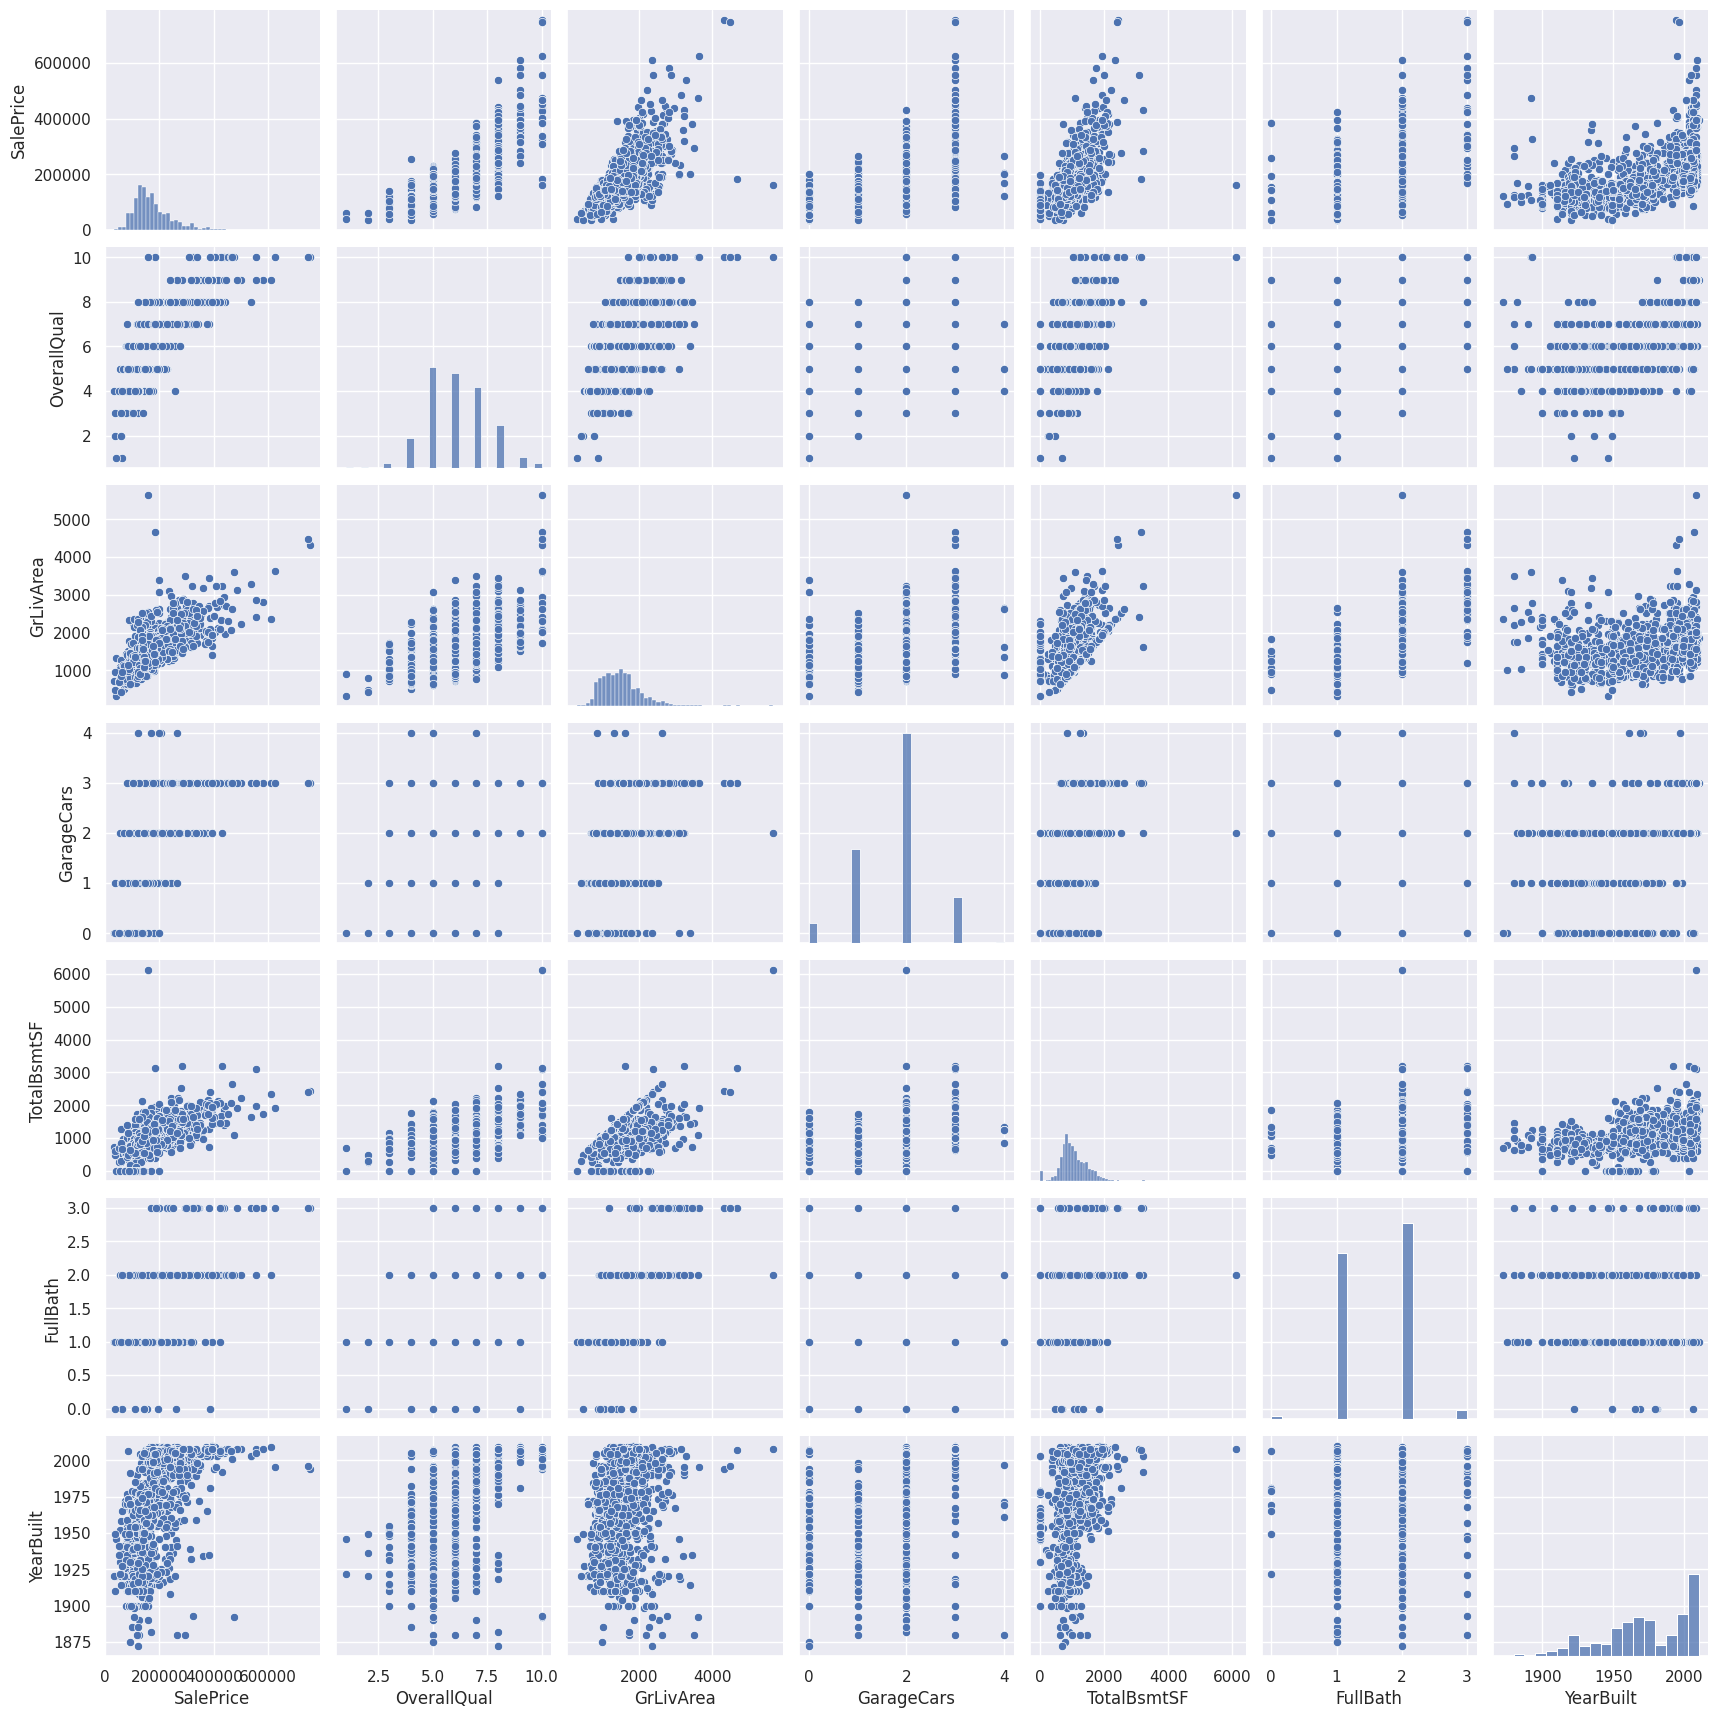

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(raw_df[cols], size = 2.5)
plt.show();

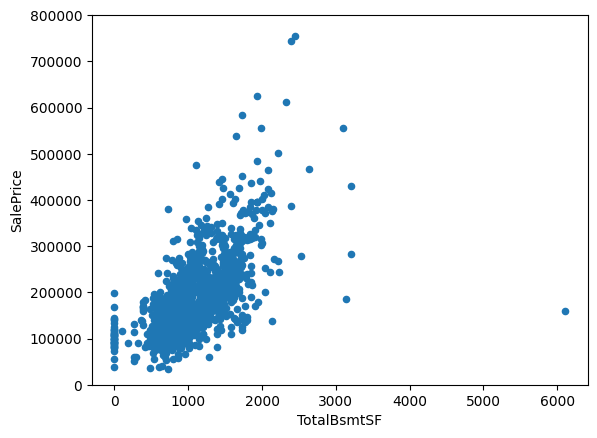

In [ ]:
data = pd.concat([raw_df['SalePrice'], raw_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

We now try to standardize, but there does not seem to be much improvement

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("train.csv")
df = pd.DataFrame(StandardScaler().fit_transform(df[cols]), columns=cols)
linear_reg(df)

R2 score on test data: 0.836
             Coefficients  LB conf intervals  UB conf intervals  p-values
OverallQual       0.32979            0.30433            0.35525   0.00000
GrLivArea         0.37174            0.34627            0.39720   0.00000
GarageCars        0.17118            0.14556            0.19681   0.00000
TotalBsmtSF       0.11551            0.09065            0.14038   0.00000
FullBath         -0.04585           -0.07129           -0.02042   0.00041
YearBuilt         0.19640            0.17157            0.22123   0.00000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


However, (1) applying logs to those features with positive skewness and (2) removing outliers substantially improve the quality of the results

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("train.csv")
df['SalePrice'] = np.log(df['SalePrice'])
df['GrLivArea'] = np.log(df['GrLivArea'])
# df.loc[df['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
df = df.sort_values(by = 'GrLivArea', ascending = True)[:-2]
df = df.sort_values(by = 'TotalBsmtSF', ascending = True)[:-1]
df = df.sort_values(by = 'SalePrice', ascending = True)[:-3]
df = pd.DataFrame(df[cols], columns=cols)
linear_reg(df)



R2 score on test data: 0.840
MSE on test data: 0.154
             Coefficients  LB conf intervals  UB conf intervals  p-values
OverallQual       0.09346            0.08654            0.10038   0.00000
GrLivArea         0.44476            0.41626            0.47327   0.00000
GarageCars        0.07869            0.06614            0.09124   0.00000
TotalBsmtSF       0.00019            0.00016            0.00021   0.00000
FullBath         -0.02757           -0.04457           -0.01057   0.00148
YearBuilt         0.00242            0.00210            0.00273   0.00000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Note that the variable TotalBsmtSF has too many zeros, so we have to be careful here when we apply logarithms

<ipython-input-21-ddcf151a0572>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalBsmtSF']);


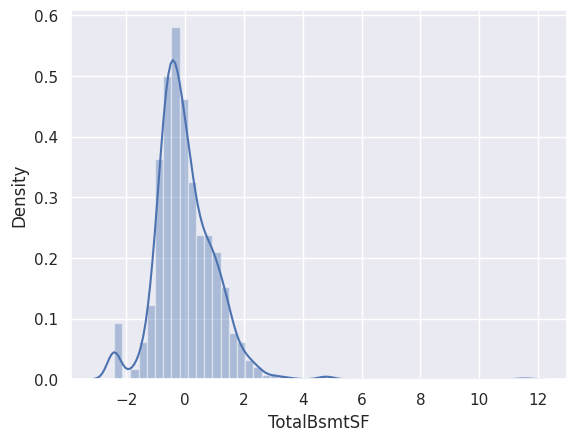

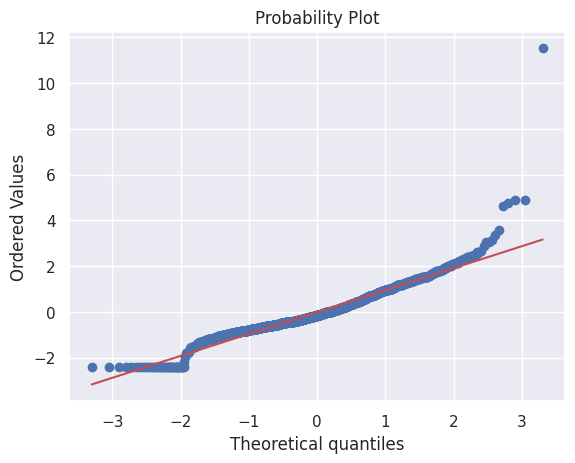

In [ ]:
sns.distplot(df['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

In [ ]:
df.loc[df['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Polynomial features

We now add polynomial features

In [ ]:
print(cols)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice^2', 'SalePrice^3', 'SalePrice_sqrt', 'OverallQual^2', 'OverallQual^3', 'OverallQual_sqrt', 'GrLivArea^2', 'GrLivArea^3', 'GrLivArea_sqrt', 'GarageCars^2', 'GarageCars^3', 'GarageCars_sqrt', 'TotalBsmtSF^2', 'TotalBsmtSF^3', 'TotalBsmtSF_sqrt', 'FullBath^2', 'FullBath^3', 'FullBath_sqrt', 'YearBuilt^2', 'YearBuilt^3', 'YearBuilt_sqrt', 'SalePrice^2^2', 'SalePrice^2^3', 'SalePrice^2_sqrt', 'SalePrice^3^2', 'SalePrice^3^3', 'SalePrice^3_sqrt', 'SalePrice_sqrt^2', 'SalePrice_sqrt^3', 'SalePrice_sqrt_sqrt', 'OverallQual^2^2', 'OverallQual^2^3', 'OverallQual^2_sqrt', 'OverallQual^3^2', 'OverallQual^3^3', 'OverallQual^3_sqrt', 'OverallQual_sqrt^2', 'OverallQual_sqrt^3', 'OverallQual_sqrt_sqrt', 'GrLivArea^2^2', 'GrLivArea^2^3', 'GrLivArea^2_sqrt', 'GrLivArea^3^2', 'GrLivArea^3^3', 'GrLivArea^3_sqrt', 'GrLivArea_sqrt^2', 'GrLivArea_sqrt^3', 'GrLivArea_sqrt_sqrt', 'GarageCars^2^2', 'Garage

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

df = pd.read_csv("train.csv")
df = df[cols]
df = pd.get_dummies(df)
df['SalePrice'] = np.log(df['SalePrice'])
df['GrLivArea'] = np.log(df['GrLivArea'])

sq_df = (df.copy() ** 2).add_suffix("^2")
# cube_df = (df[cols].copy() ** 3).add_suffix("^3")
# sqrt_df = np.sqrt(df[cols].copy()).add_suffix("_sqrt")

df = pd.concat([df, sq_df], axis=1)
df = df.sort_values(by = 'GrLivArea', ascending = True)[:-2]
df = df.sort_values(by = 'TotalBsmtSF', ascending = True)[:-1]
df = df.sort_values(by = 'SalePrice', ascending = True)[:-3]
col_names = df.columns
linear_reg(pd.DataFrame(StandardScaler().fit_transform(SimpleImputer().fit_transform(df)), columns=col_names))

R2 score on test data: 1.000
MSE on test data: 0.016
               Coefficients  LB conf intervals  UB conf intervals  p-values
OverallQual         0.06588            0.06485            0.06692   0.00000
GrLivArea           0.24873            0.24771            0.24976   0.00000
GarageCars          0.01222            0.01119            0.01325   0.00000
TotalBsmtSF         0.01006            0.00900            0.01111   0.00000
FullBath            0.00660            0.00558            0.00762   0.00000
YearBuilt           0.10246            0.10142            0.10350   0.00000
SalePrice^2         1.01407            1.01304            1.01510   0.00000
OverallQual^2      -0.07407           -0.07511           -0.07302   0.00000
GrLivArea^2        -0.25244           -0.25346           -0.25141   0.00000
GarageCars^2       -0.01334           -0.01437           -0.01230   0.00000
TotalBsmtSF^2      -0.01519           -0.01626           -0.01412   0.00000
FullBath^2         -0.00485        

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
